# Demonstration of Both Models Working Together

In the following example, we're going to show what happens if we use both models to support an example where we need to determine whether first, the image contains a car, and second, whether the car is damaged or not. The justification of why we have separate models is based on needing specific classifiers trained for different purposes.

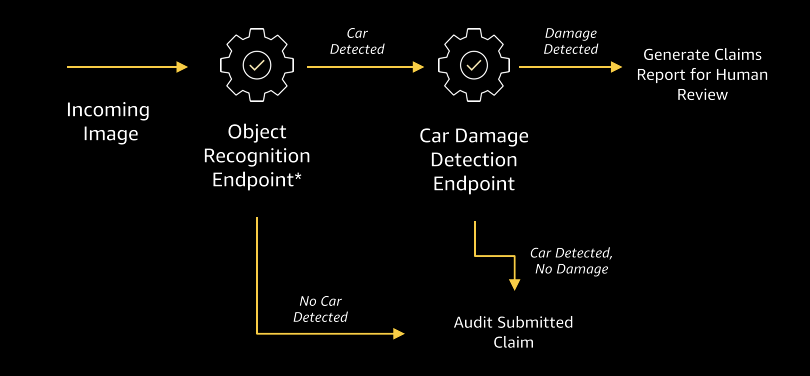

In [7]:
%cwd ../
%pwd  #look at the current work dir

UsageError: Line magic function `%cwd` not found.


In [5]:
from src.objectdetector import ObjectDetector
from src.cardamagedetector import CarDamageDetector

ModuleNotFoundError: No module named 'src'

In [ ]:
od = ObjectDetector('object-detection-2020-01-30-07-10-53-209')
cdd = CarDamageDetector('image-classification-2020-02-07-05-24-20-993')

In [ ]:
def determine_if_needs_audit_or_filing(od, cdd, image_url, acceptable_thresh = 0.1):
    
    obj_to_detect = 'car'
    expected_predicted_class = 'Damage'
    #download the image
    image_local_path = od.download_image(image_url, to_save_filename='test-image.jpg')
    #score the image with the first model
    classes_and_scores = od.visualize_detection(image_local_path, acceptable_thresh)
    print(classes_and_scores)
    #1. first run it through the obhect detector

    goto_second_classifier = False
    #Determine if a car exists in the object
    if obj_to_detect in classes_and_scores:
        if classes_and_scores[obj_to_detect] > acceptable_thresh:
            goto_second_classifier = True
    
    if goto_second_classifier:    
    #2. Now check if the image contains a damaged vehicle
        predicted_class = cdd.predict_if_contains_damage(image_local_path)
        if expected_predicted_class == 'Damage':
            print('No Audit Needed, execute workflow to create report')
        else:
            print('Audit Required')
        

In [ ]:
determine_if_needs_audit_or_filing(od, cdd, image_url = 'https://image.shutterstock.com/z/stock-photo-isolate-side-of-the-car-the-color-of-braun-white-which-crashed-with-another-car-until-it-was-596238068.jpg')